# World Happiness Report Project

## Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor 

In [6]:
df=pd.read_csv('C:\\Users\HP\Desktop\happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


The dataset consists of 158 rows and 12 columns

In [7]:
df.head()     # top 5 happiest country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
df.tail(10) # least 10 unhappiest country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [9]:
df.sample(5)  #5 random country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
72,Estonia,Central and Eastern Europe,73,5.429,0.04013,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,1.58782
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173
110,Ukraine,Central and Eastern Europe,111,4.681,0.04412,0.79907,1.20278,0.67390,0.25123,0.02961,0.15275,1.57140


In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

<Axes: >

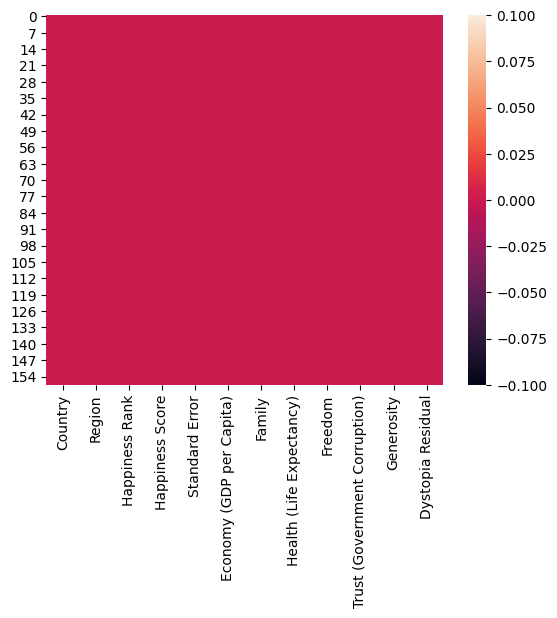

In [13]:
#heatmap of null values
sns.heatmap(df.isnull())

There are no null vlaues

In [14]:
df.duplicated().sum()

0

there is no duplicate values

In [15]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


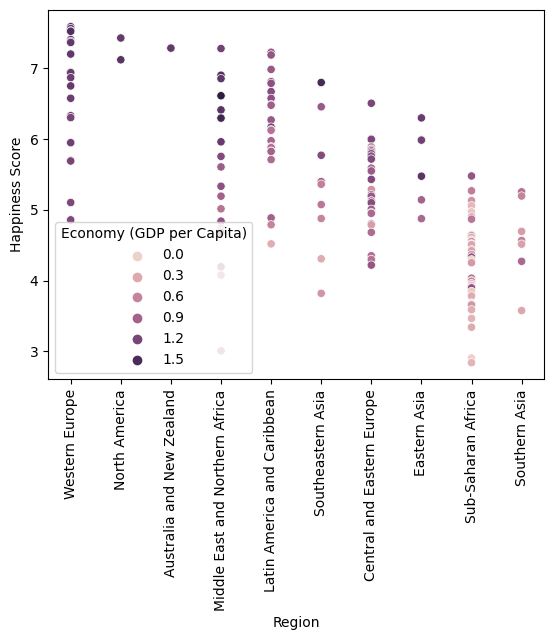

In [16]:
sns.scatterplot(x="Region", y="Happiness Score",hue= "Economy (GDP per Capita)" ,data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In the region, weastern europe happy score is high as well as gdp is also high.

in sub-saharan africa and southern asia gdp is low as well as happy sccore is also low

# Separating Numerical and Categorical Columns

In [17]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("Numerical Columns:")
print(numerical_columns)


print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Categorical Columns:
['Country', 'Region']


In [18]:
#value counts of region column
df['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

# Creating a new column based on happiness score

In [19]:
happiness = []
for score in df['Happiness Score']:
    if score < 4:
        happiness.append("Unhappy")
    elif score >= 4 and score <= 6:
        happiness.append("Normal")
    else:
        happiness.append("Happy")

pred_happiness = pd.DataFrame(happiness, columns=["Predicted_Happiness"])

pred_happiness = pred_happiness.astype('category')

df1 = pd.concat([df, pred_happiness], axis=1)
df1['Predicted_Happiness'].value_counts()

Predicted_Happiness
Normal     93
Happy      44
Unhappy    21
Name: count, dtype: int64

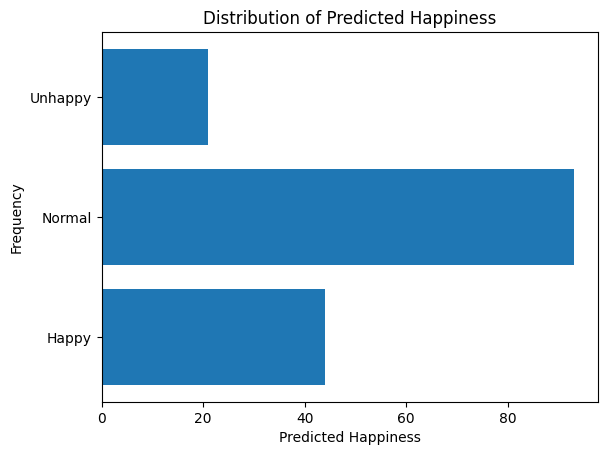

In [20]:
countries = df1['Country']
predicted_happiness = df1['Predicted_Happiness']
category_counts = {}
for happiness in predicted_happiness:
    if happiness not in category_counts:
        category_counts[happiness] = 0
    category_counts[happiness] += 1

categories = list(category_counts.keys())
frequencies = list(category_counts.values())

plt.barh(categories, frequencies)

plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness')
plt.show()

### The number of Normal Country is highest

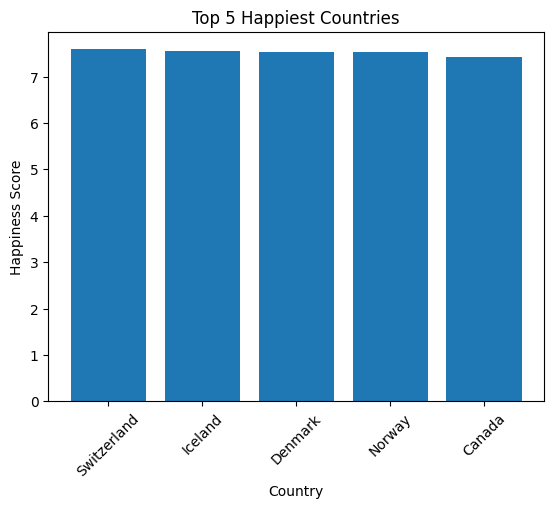

In [22]:
top_5_countries = df1.sort_values('Happiness Score', ascending=False).head(5)
plt.bar(top_5_countries['Country'], top_5_countries['Happiness Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries')
plt.xticks(rotation=45)
plt.show()

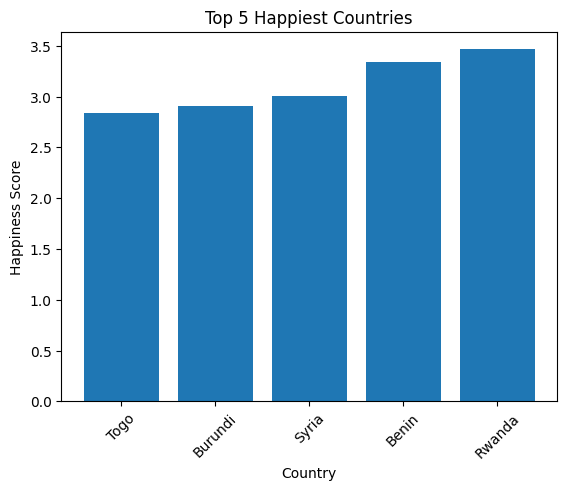

In [23]:
top_5_countries = df1.sort_values('Happiness Score', ascending=True).head(5)
plt.bar(top_5_countries['Country'], top_5_countries['Happiness Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries')
plt.xticks(rotation=45)
plt.show()

In [25]:
df1.sample(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Predicted_Happiness
106,Tunisia,Middle East and Northern Africa,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466,Normal


# Dropping columns that are not contributing towards my label prediction

In [26]:
df1 = df1.drop(['Country', 'Region', 'Happiness Rank',"Predicted_Happiness"], axis=1)

In [27]:
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


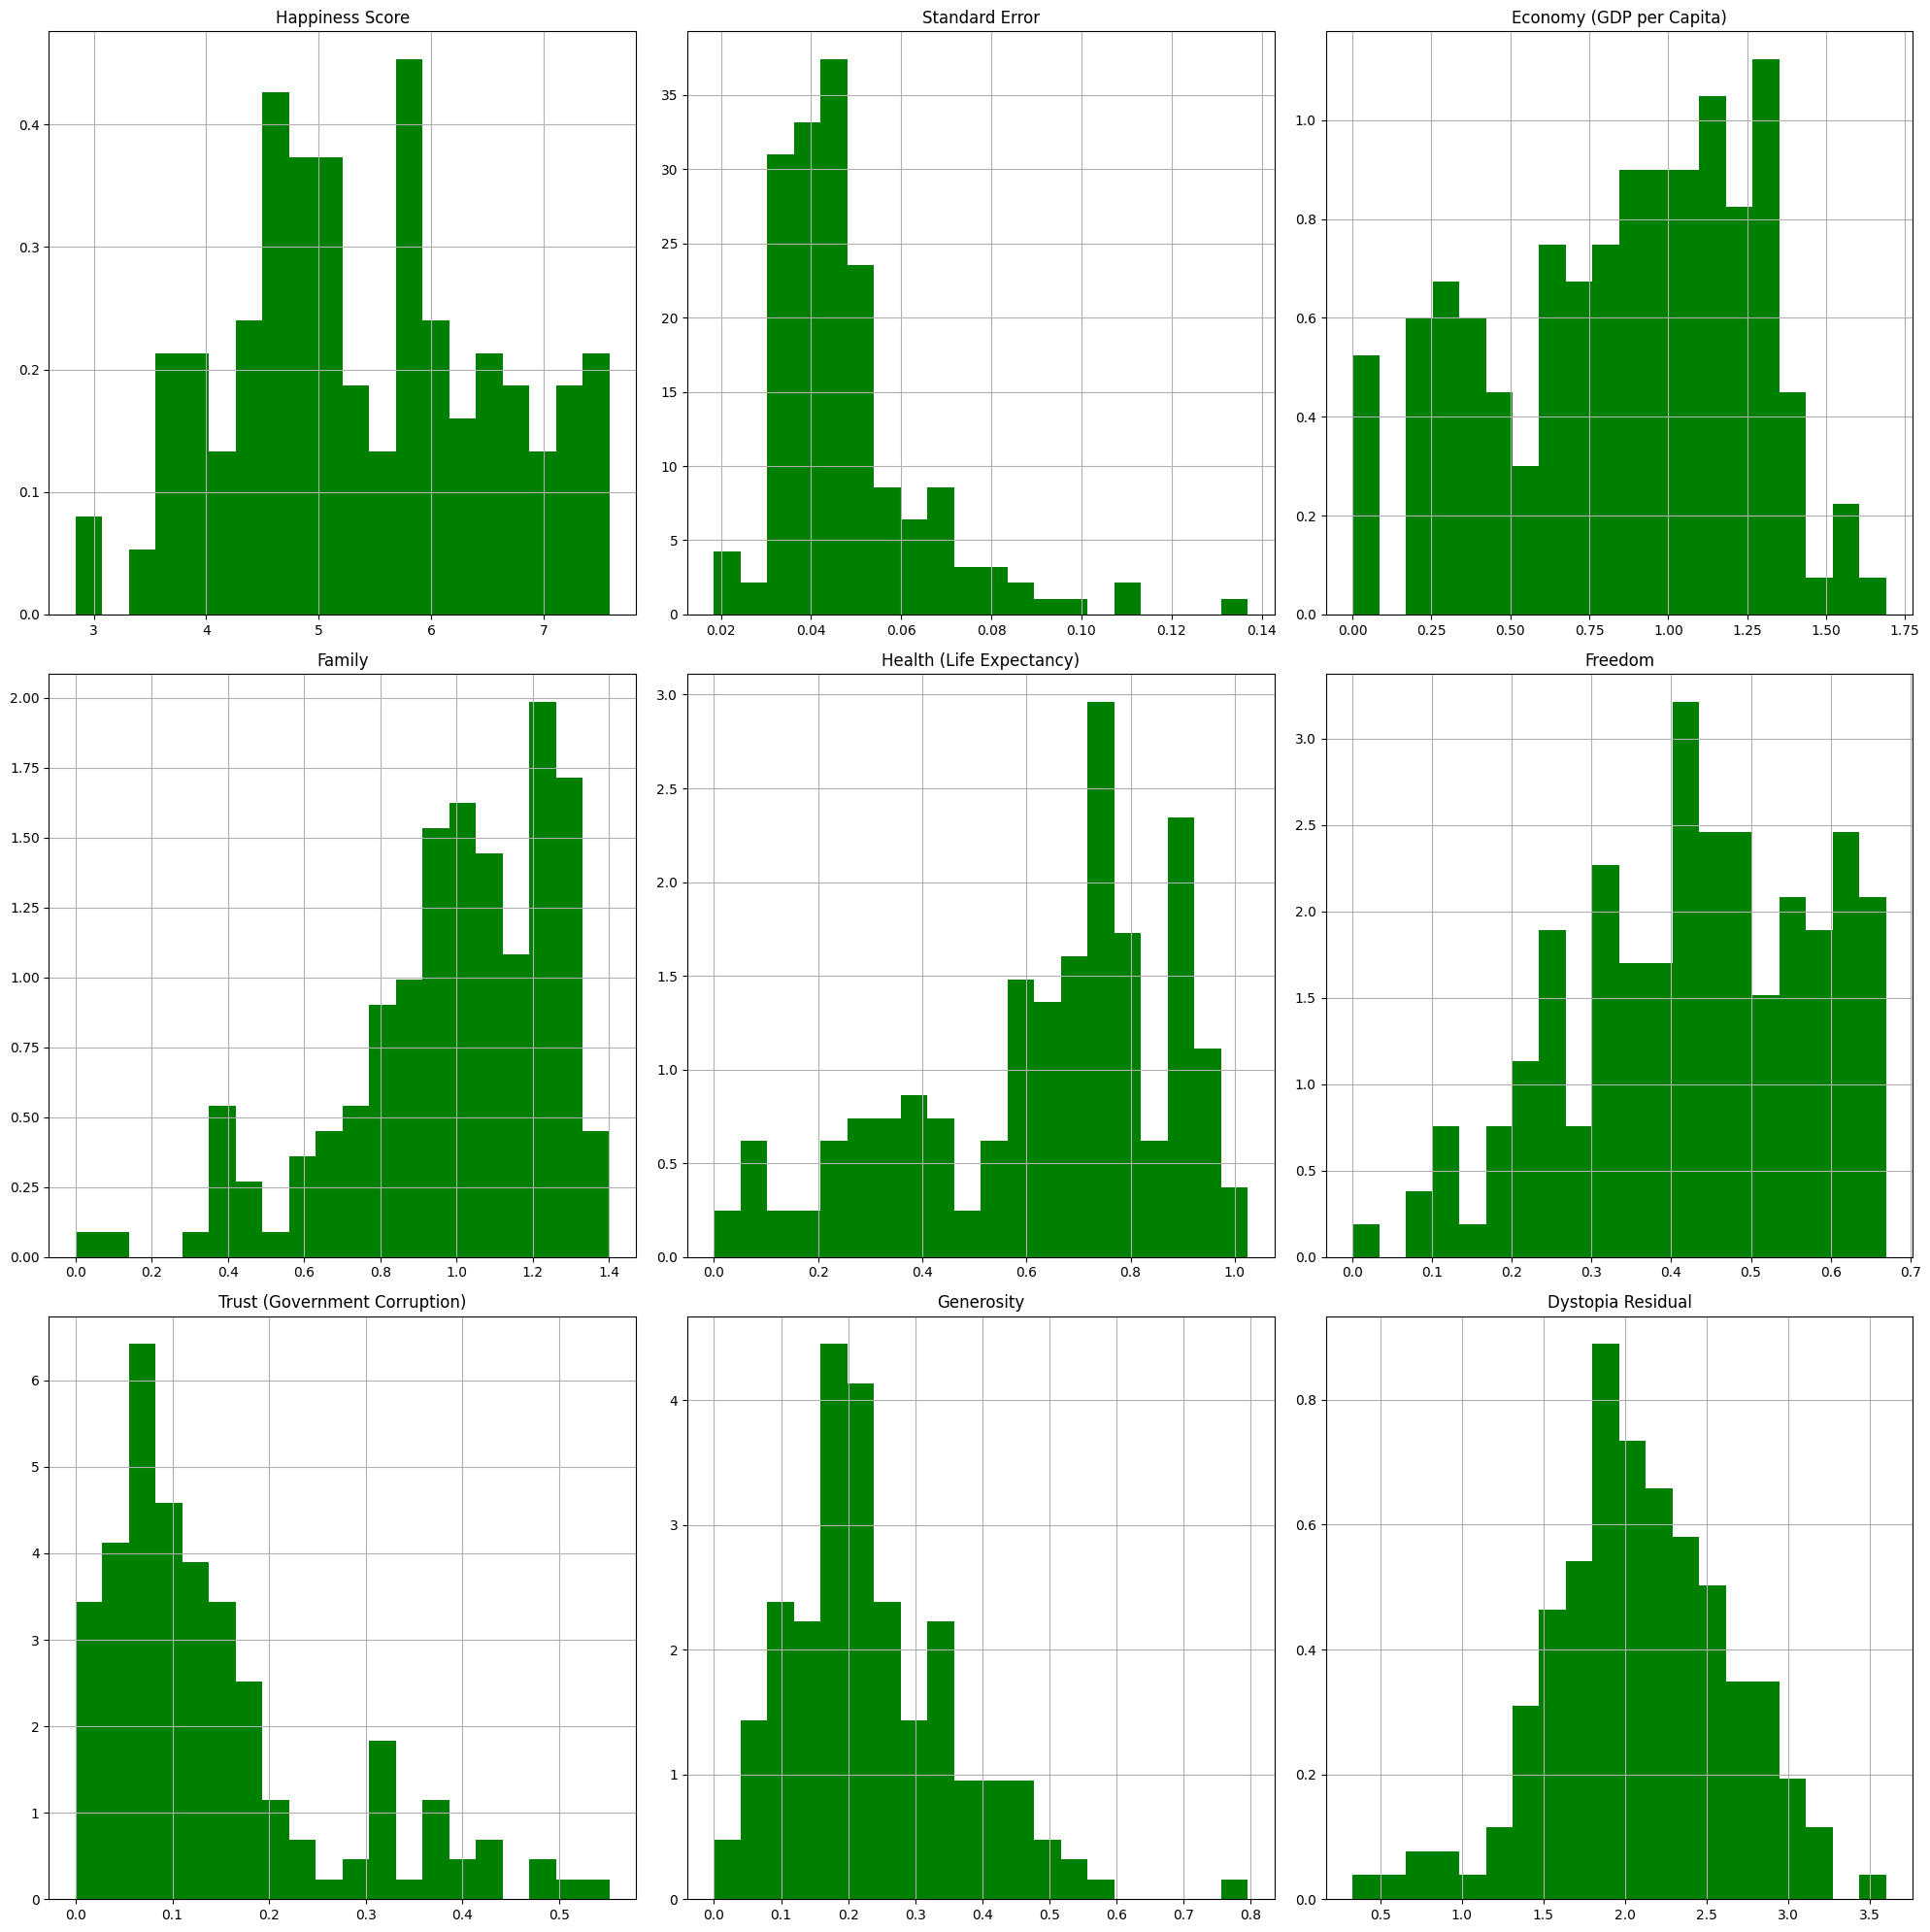

In [28]:
plt.rcParams['figure.figsize'] = (20,20)
df1.hist(bins=20, color='green', density=True, label='Value', histtype='bar')
plt.tight_layout()
plt.show()

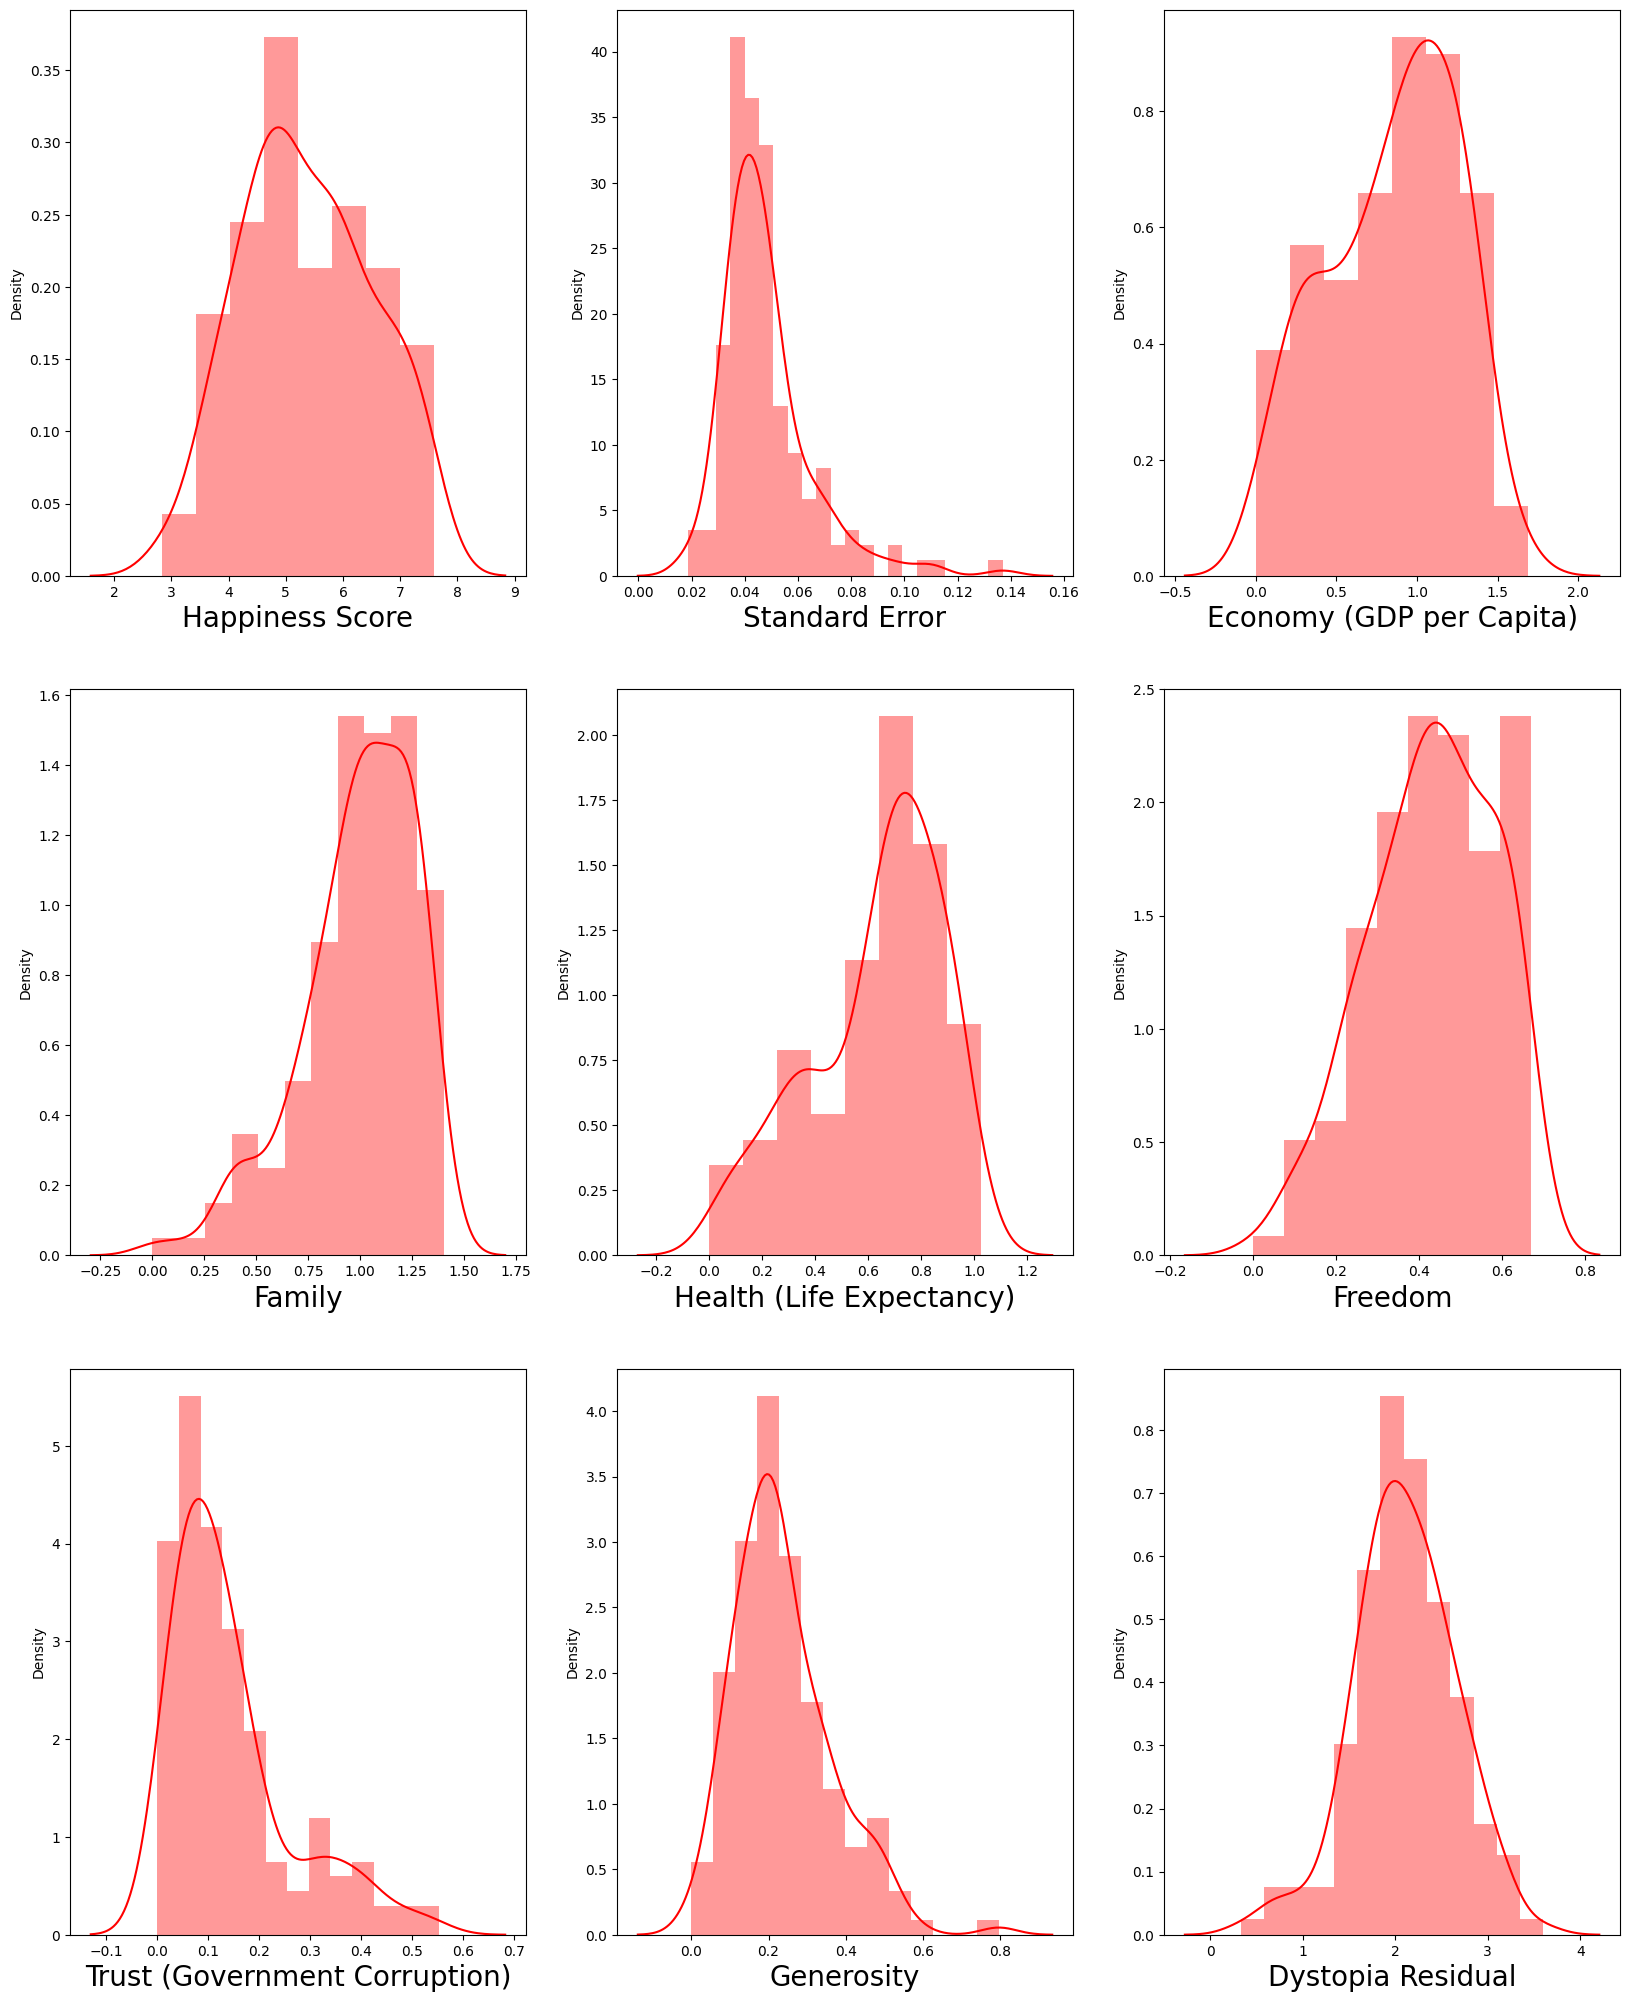

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df1.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking skewness

In [30]:
df1.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

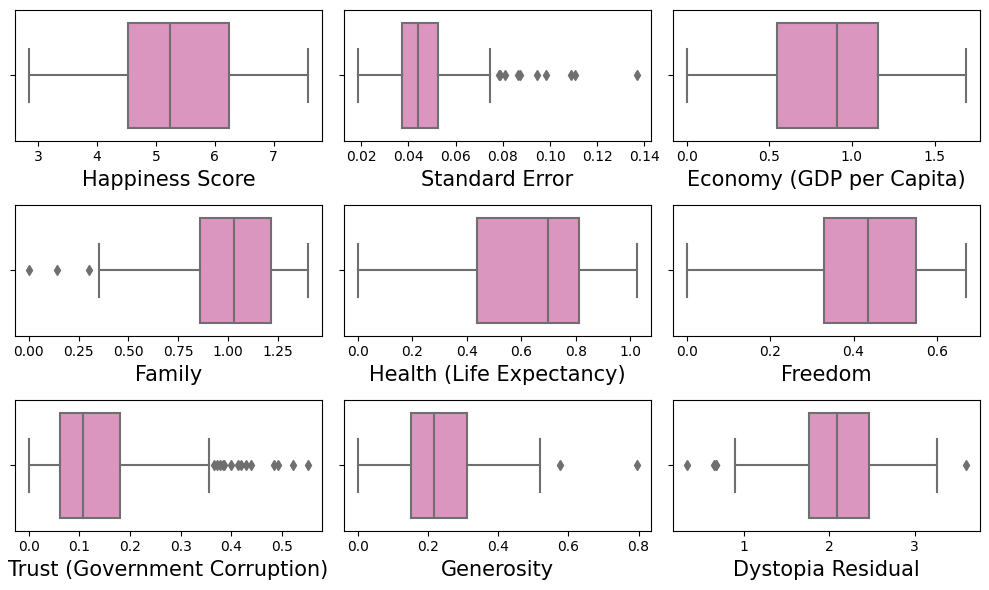

In [31]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in df1.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)

        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

There are some outliers present in dataset

In [32]:
# Removing outliers using Z score method
from scipy.stats import zscore

z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

df2=df1[(z<3).all(axis=1)]
df2.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [33]:
df2.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239
Dystopia Residual,0.528334,0.045722,0.026936,0.118062,0.031212,0.058596,0.078080,-0.034239,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

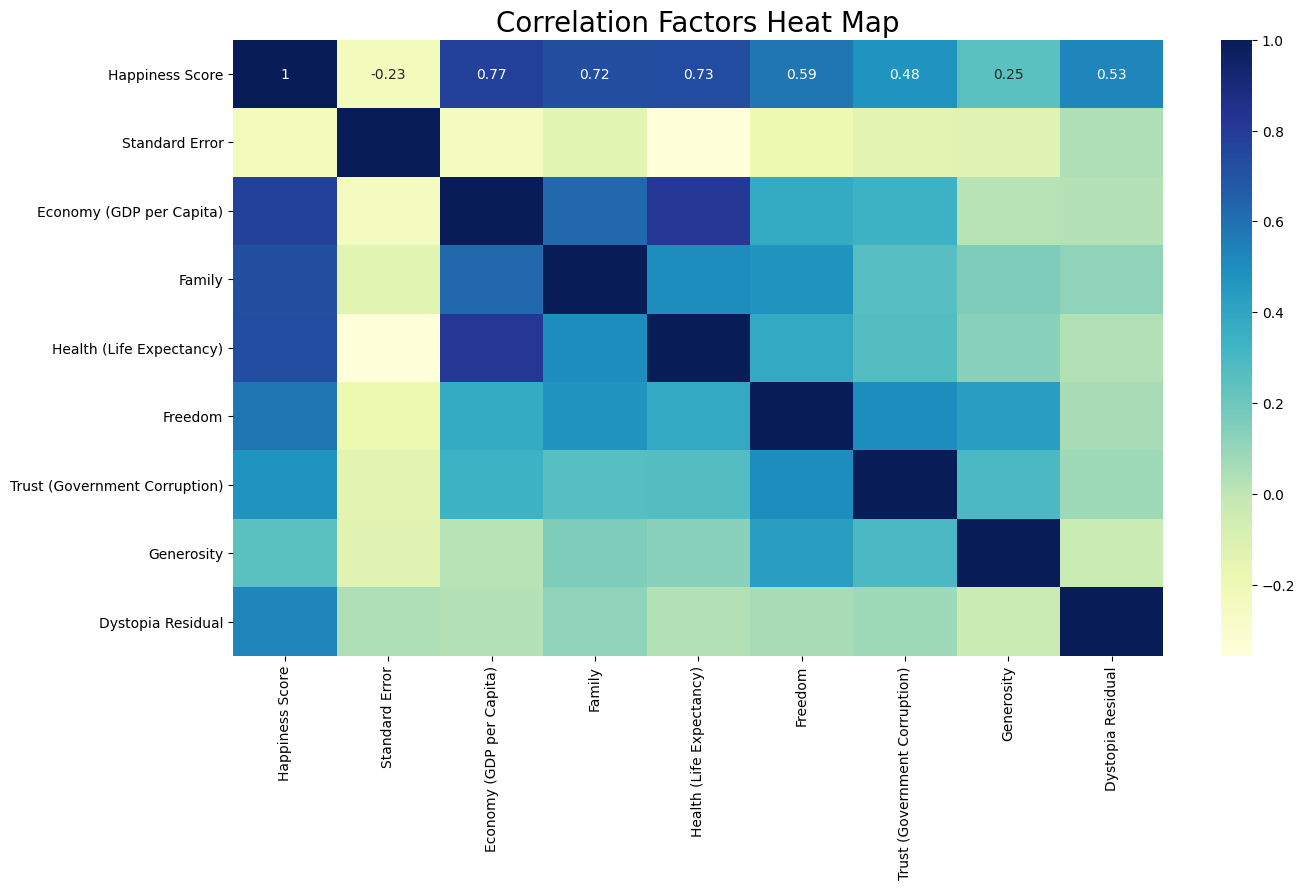

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

Health Life Expectancy is highly correlated with Economy GDP per Capita so we will drop Health Life Expectancy

In [35]:
df2 = df2.drop(['Health (Life Expectancy)'], axis=1)

In [36]:
df2.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


# Spliting into feature and label

In [37]:
x = df2.drop('Happiness Score', axis=1)
y = df2['Happiness Score'] 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.866786,1.381916,1.357879,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,0.379439,-0.533653,-0.409226,-0.930702


# Checking Best Random State

In [39]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    gb=GradientBoostingRegressor(n_estimators=100)
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
    
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9624069401478108 on Random_state 22


# Train Test Split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=97)

In [41]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (104, 7)
y_train shape: (104,)
x_test shape: (45, 7)
y_test.shape: (45,)


# Linear regression

In [42]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)
print(LR.score(x_train,y_train)*100," %")
print(r2_score(y_test,pred_LR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

98.3916353626044  %
98.71926508949  %
Mean absolute error: 0.10594438867444068
Mean squared error: 0.016113882988094613
Root mean squared error: 0.1269404702531648


# KNeighborsRegressor

In [43]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
print('R2_score',r2_score(y_test,pred_KNN)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_KNN))
print('Mean squared error:',mean_squared_error(y_test,pred_KNN))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score 90.08634702474146  %
Mean absolute error: 0.26177333333333336
Mean squared error: 0.1247310764444445
Root mean squared error: 0.35317287048192775


# Ridge Regression

In [44]:
RR = Ridge(alpha=10)
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)

print('R2_score',r2_score(y_test,pred_RR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_RR))
print('Mean squared error:',mean_squared_error(y_test,pred_RR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RR)))

R2_score 98.37334452447674  %
Mean absolute error: 0.11640657178024769
Mean squared error: 0.020466168119121095
Root mean squared error: 0.1430600157944948


# Lasso Regression

In [45]:
L = Lasso(alpha=0.001)
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

R2_score 98.73955494047215  %
Mean absolute error: 0.10493360160616239
Mean squared error: 0.01585860121050809
Root mean squared error: 0.12593093825787247


# Decision Tree Regression

In [46]:
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
print('R2_score',r2_score(y_test,pred_DTR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_DTR))
print('Mean squared error:',mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score 75.72352643227337  %
Mean absolute error: 0.4572315167548502
Mean squared error: 0.3054404554945271
Root mean squared error: 0.5526666766637257


# Support vector Regression

In [47]:
SV = SVR()
SV.fit(x_train, y_train)
pred_SVR = SV.predict(x_test)
print('R2_score',r2_score(y_test,pred_SVR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_SVR))
print('Mean squared error:',mean_squared_error(y_test,pred_SVR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score 93.05879789301187  %
Mean absolute error: 0.21325737688180307
Mean squared error: 0.0873324507912278
Root mean squared error: 0.2955206435957187


# RandomForestRegressor

In [49]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
print('R2_score',r2_score(y_test,pred_RFR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean squared error:',mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 93.39642109504003  %
Mean absolute error: 0.22883711111111013
Mean squared error: 0.08308456098444399
Root mean squared error: 0.28824392618829625


# Gradient Boosting Regressor

In [50]:
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
print('R2_score',r2_score(y_test,pred_GBR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean squared error:',mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 95.95708270021105  %
Mean absolute error: 0.17298207326611056
Mean squared error: 0.05086696377582161
Root mean squared error: 0.22553705632516713


# AdaBoostRegressor

In [51]:
ADB = AdaBoostRegressor(n_estimators=100)
ADB.fit(x_train,y_train)
pred_ADB = ADB.predict(x_test)
print('R2_score',r2_score(y_test,pred_ADB)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_ADB))
print('Mean squared error:',mean_squared_error(y_test,pred_ADB))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_ADB)))

R2_score 90.81812516340979  %
Mean absolute error: 0.2765104663955017
Mean squared error: 0.11552402883218596
Root mean squared error: 0.33988825933266065


## Lasso Regressor gives max Accuracy

In [52]:
import joblib
# Save the model as a objectfile

joblib.dump(L,'World Happiness Report Project') #already saved the model that is put this code as commen

['World Happiness Report Project']

In [53]:
df2.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


In [54]:
reopen=joblib.load(open("World Happiness Report Project","rb"))
reopen

Lasso(alpha=0.001)

In [55]:
test = (0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176) #taking data from 5th row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = reopen.predict(reshape)
print("Predicted value:", pred)

Predicted value: [8.02471512]
